# Packages

In [3]:
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

# Functions and constants

In [4]:
# run t_all_days.py and t_extreme_days.py by submitting jobs in GADI on the the terminal to get t_all_days.nc and t_extreme_days.nc

# Read data

In [5]:
# Load all days and extreme days datasets for stations
all_days_station = xr.open_dataset('t_all_days.nc')
extreme_days_station = xr.open_dataset('t_extreme_days.nc')

# Analysis

In [6]:
#all days, all station mean
all_days_mean = all_days_station.mean(dim='station')

# Calculate the mean for extreme days across all stations
extreme_days_mean = extreme_days_station.mean(dim='station')

# Align datasets if necessary
aligned_extreme_days_mean = extreme_days_mean.reindex_like(all_days_mean)

# All stations mean
mean_anomaly = aligned_extreme_days_mean['t'] - all_days_mean['t']

mean_anomaly

<xarray.DataArray 't' (level: 37)> Size: 148B
array([-0.46929932,  0.21954346,  0.22998047,  0.2911377 ,  0.89160156,
        0.9472046 , -0.18951416, -0.30911255, -0.3331604 , -0.01397705,
       -0.7819824 , -0.21380615,  0.14875793,  0.37503052,  0.5254364 ,
        0.5760803 ,  0.5499573 ,  0.44969177,  0.3452301 ,  0.30599976,
        0.34454346,  0.3335266 ,  0.24023438,  0.05316162,  0.01348877,
        0.0045166 , -0.05621338, -0.07192993, -0.07406616, -0.07434082,
       -0.0848999 , -0.08813477, -0.09274292, -0.09661865, -0.1149292 ,
       -0.1425476 , -0.14694214], dtype=float32)
Coordinates:
  * level    (level) int32 148B 1 2 3 5 7 10 20 ... 850 875 900 925 950 975 1000

# Plots

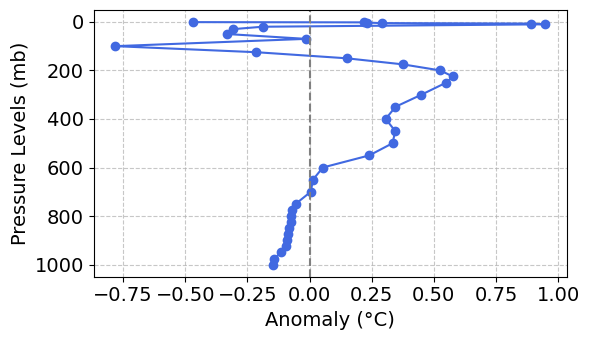

In [8]:
# Plot the anomaly 't' values against all levels
plt.figure(figsize=(6, 3.5))
plt.plot(mean_anomaly, mean_anomaly['level'], marker='o', linestyle='-', color='royalblue')  # Set line color to blue
plt.gca().invert_yaxis()  # Invert y-axis to show levels in the correct order
plt.axvline(x=0, color='gray', linestyle='--')  # Add a vertical line at t = 0
plt.xlabel('Anomaly (°C)', fontsize=14)
plt.ylabel('Pressure Levels (mb)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.title('Mean Vertical Profile of Temperature Anomalies of Extreme Events (°C)')
plt.grid(True, linestyle="--", alpha=0.7)

plt.tight_layout()
plt.show()